# Evaluating Uncertainty in Earthquake-Location Estimates for Groningen Seismicity


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## General


In [2]:
#define the time sampling and total recording time of seismic data
dt = 0.002  # s
tmax = 7.9  # s
nt = int(tmax/dt) + 1   # IMPORTANT: inclusive end time -> 3951
t = np.arange(nt)*dt

#sampling frequency
f_s = 1 / dt
f_n = f_s / 2

#defines the positions of the receviers
dx_rec = 2.5
x_rec = np.arange(2000.0, 8000.0 + dx_rec/2, dx_rec)
nx = x_rec.size
x_src = 5001.0

dz = 1.25  # log/model depth sampling

#centre freq
f_centre = 40 #Hz

## Task 1: load in the data and show the gathers

In [3]:
#function to read the binary file
def read_gather(path, nt=nt, nx=nx, dtype=np.float32):
    tmp = np.fromfile(path, dtype=dtype)
    if tmp.size != nt*nx:
        raise ValueError(f"{path}: expected {nt*nx}, got {tmp.size}")
    # IMPORTANT: data is trace-major → Fortran order
    return np.reshape(tmp, (nt, nx), order='F')


def read_1d(path, n, dtype=np.float32):
    a = np.fromfile(path, dtype=dtype)
    if a.size != n:
        raise ValueError(f"{path}: expected {n}, got {a.size}")
    return a

#shows a seismic gather as an image, time vertically and recevier point horizontally
def show_gather(g, title, clip=99.5):
    # Amplitude clipping for display
    lim = np.percentile(np.abs(g), clip)

    # Define physical axes
    extent = [
        np.min(x_rec),           # receiverPositions min
        np.max(x_rec),           # receiverPositions max
        np.max(t),               # timeSamples max (bottom)
        np.min(t)                # timeSamples min (top)
    ]

    plt.figure(figsize=(10,5))
    plt.imshow(
        g,
        cmap="gray",
        aspect="auto",
        extent=extent,
        vmin=-lim,
        vmax=lim
    )
    plt.xlabel("Receiver position (m)")
    plt.ylabel("Time (s)")
    plt.title(title)
    plt.show()

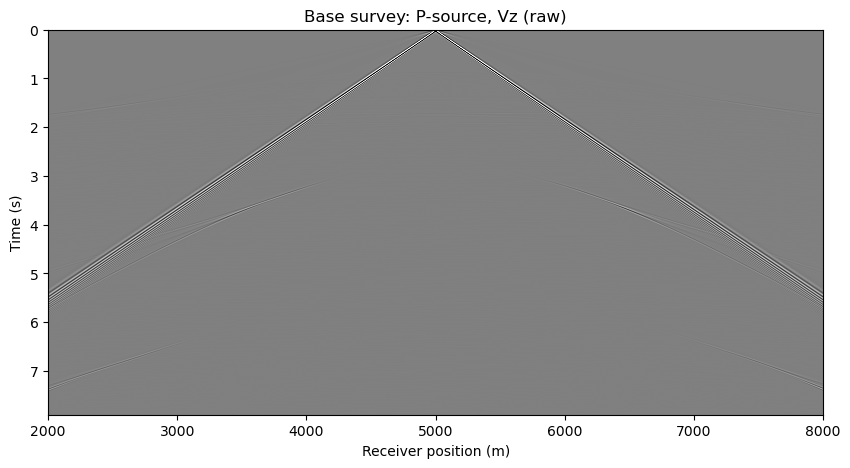

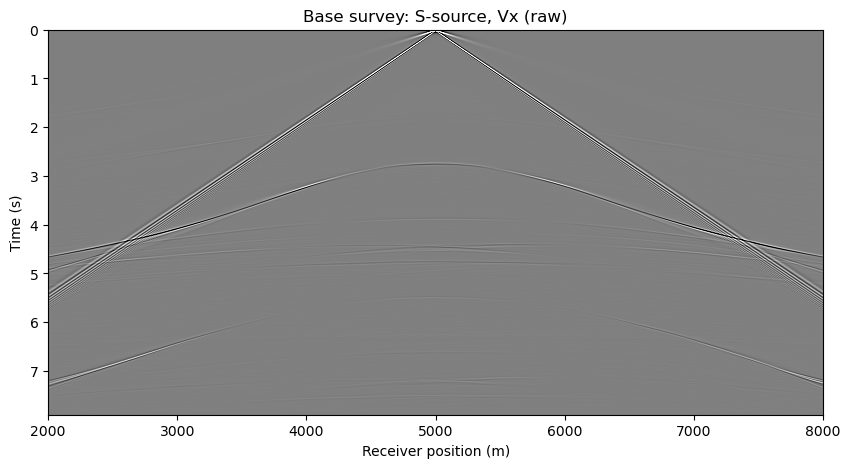

In [4]:
gP_base = read_gather("shot_base_p_source_at_5001_and_rvz.bin")
gS_base = read_gather("shot_base_s_source_at_5001_and_rvx.bin")
gP_mon  = read_gather("shot_monitor_p_source_at_5001_and_rvz.bin")
gS_mon  = read_gather("shot_monitor_s_source_at_5001_and_rvx.bin")

vp_log = read_1d("borehole_Pwave_log.bin", n=3600)
vs_log = read_1d("borehole_Swave_log.bin", n=3600)


#these are the two graphs also seen in the assignment, so the data is correctly imported and reshaped
show_gather(gP_base, "Base survey: P-source, Vz (raw)")
show_gather(gS_base, "Base survey: S-source, Vx (raw)")

## Task 2: supression of the surface waves